In [1]:
import pandas as pd
import numpy as np
from config import *
import seaborn as sns
import matplotlib.pyplot as plt
from modules.transformations import *

In [2]:
df = pd.read_csv(DATA_FILE_PATH)
dictionary = pd.read_csv(DICTIONARY_PATH)
dictionary.columns = ["country_name", "state_name", "sovereign" ,"country_code_2", "country_code_3", "numeric_code", "subdivision", "internet_domain"]
name_mapping = dictionary[["country_name", "country_code_3"]]

The first step for my is getting this data into a format that's more easily digestible.
The formatting is initally as an incredibly sparse matrix, but I'm more interested in representing the data as a series of vectors.

In [3]:
df.rename(
    columns = COLUMN_MAPPINGS,
    inplace= True
)

df.set_index('source', inplace=True)
df

,ABW,AFG,AGO,ALB,ARE,ARG,ARM,ATG,AUS,AUT,...,VCT,VEN,VIR,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
source,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,0,0,0,1,0,2,36,2,...,15,337,78,0,0,0,0,0,0,0
AFG,0,0,0,0,501,4,0,0,5859,801,...,0,0,0,0,0,0,0,7,0,0
AGO,0,0,0,0,0,2,0,0,41,21,...,0,19,0,0,0,0,0,1957,21090,0
ALB,0,0,0,0,0,21,1,0,261,212,...,0,3,0,0,0,0,0,22,0,0
ARE,1,233,0,1,0,2,1,1,1157,60,...,0,6,0,83,0,0,6610,99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0,0,0,0,0,0,0,0,4742,0,...,0,0,0,0,1,0,0,0,0,0
YEM,0,0,0,0,31178,0,0,0,253,28,...,0,1,0,0,0,0,0,24,0,0
ZAF,0,3,1801,8,16,122,0,5,10042,460,...,0,41,0,14,0,0,7,0,1265,6123


In [4]:
data = matrix_to_vectors(df)

In [5]:
dictionary.columns = ["country_name", "state_name", "sovereign" ,"country_code_2", "country_code_3", "numeric_code", "subdivision", "internet_domain"]
dictionary

,country_name,state_name,sovereign,country_code_2,country_code_3,numeric_code,subdivision,internet_domain
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,4,ISO 3166-2:AF,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,8,ISO 3166-2:AL,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,12,ISO 3166-2:DZ,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,16,ISO 3166-2:AS,.as
...,...,...,...,...,...,...,...,...
243,Wallis and Futuna,The Territory of the Wallis and Futuna Islands,France,WF,WLF,876,ISO 3166-2:WF,.wf
244,Western Sahara [ah],The Sahrawi Arab Democratic Republic,Disputed [ai],EH,ESH,732,ISO 3166-2:EH,[aj]
245,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye
246,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm


In [6]:
# transform the series into a dataframe to be joined
totals = df.sum().sort_values().to_frame().reset_index()
totals.columns = ["location", "alpha"]
totals

,location,alpha
0,KIR,252
1,VUT,511
2,SLB,679
3,FSM,706
4,MNG,1917
...,...,...
195,GBR,1937742
196,IND,2202197
197,DEU,2828991
198,RUS,4911421


In [7]:
new = totals.merge(
    right = name_mapping,
    how = "left",
    left_on = "location",
    right_on = "country_code_3"
)[["country_name", "alpha"]]

In [8]:
new

,country_name,alpha
0,Kiribati,252
1,Vanuatu,511
2,Solomon Islands,679
3,Micronesia (Federated States of),706
4,Mongolia,1917
...,...,...
195,United Kingdom of Great Britain and Northern I...,1937742
196,India,2202197
197,Germany,2828991
198,Russian Federation (the) [v],4911421


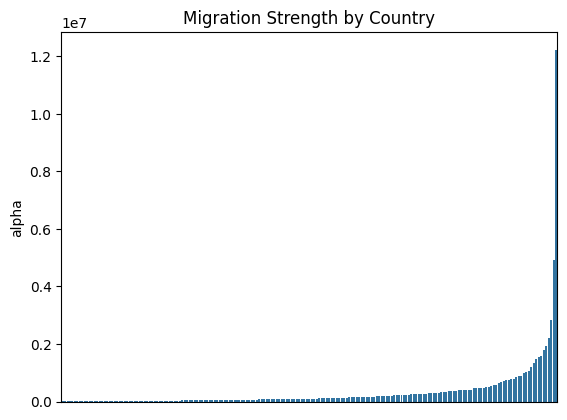

In [13]:
ax = sns.barplot(
    data = new,
    x = "country_name",
    y = "alpha"
)

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.title("Migration Strength by Country")
plt.xlabel("")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

# Display the plot
plt.show()